In [1]:
from IPython.display import Image

# Learning Deep Features for Discriminative Localization

### 논문 선정 이유
- 딥러닝은 여러개의 깊은 층으로 이루어져 많은 연산을 통해 좋은 성능을 가져오지만 그 좋은 성능을 어떻게 가져오는지 찾아보기 어렵다. 하이퍼파라미터 튜닝을 통해서 더 좋은 성능을 찾는 모델을 만들 수 있지만 설명하기는 힘들다. 딥러닝이 어떻게 예측을 하는지 설명할 수 있다는 것이 흥미로웠다.

### 논문 동기
- CNN을 통해서 분류할 때 CNN은 특정 지역의 정보를 명확하게 해석하지 못하였다. Filter를 통해 edge 및 특정 feature들을 추출한다는 점은 알지만 왜 특정 카테고리로 분류되는지는 알 수 없었기 때문에 본 논문에서는 CAM을 통해 이미지가 어떻게 분류되는지 해석한다.

## CNN feature map

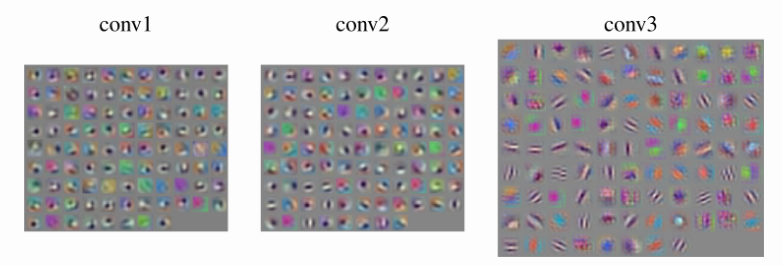

In [2]:
Image("conv_feature.png")

## Propose
- 바운딩 박스 데이터를 넣지 않아도 Classification을 목적으로 학습된 모델을 조금 변형해서 Object localization이 가능하다.
- GAP는 파라미터 수를 줄여 오버피팅을 방지하는 기능 외에도, 오브젝트의 위치 정보를 보존하는데 사용할 수 있다.
- 제안된 다른 위치 추적 방식들에 비해 CAM은 한번에 (single forward pass) end-to-end로 학습할 수 있다.
- 다른 데이터셋을 활용한 분류, 위치 특정, 컨셉 추출에도 쉽게 대입해서 사용할 수 있다.

## Global Average Pooling
- Network in Network에서 제안된 방법
- Fully connected layer가 overfitting을 일으키기 때문에 대신 GAP를 사용

## Global Average Pooling vs Global Max Pooling
- GMP는 가장 큰 값을 사용하여 하나의 판별적인 부분만을 활용하고 GAP는 평균값으로 범위를 더 넓게 활용할 수 있다.
- 이미지에서 GAP와 GMP가 중요하다고 생각하는 부분의 위치가 다르다. 
- GMP의 경우에는 가장 판별적인 부분을 제외한 모든 이미지 영역에서 낮은 점수는 점수 영향에 미치지 않지만 GAP의 경우는 점수에 모든 영역의 점수들이 반영된다.
- GMP와 GAP는 비슷한 분류 성능을 가지지만 위치화 성능면에서는 GAP가 더욱 높은 성능을 가진다.

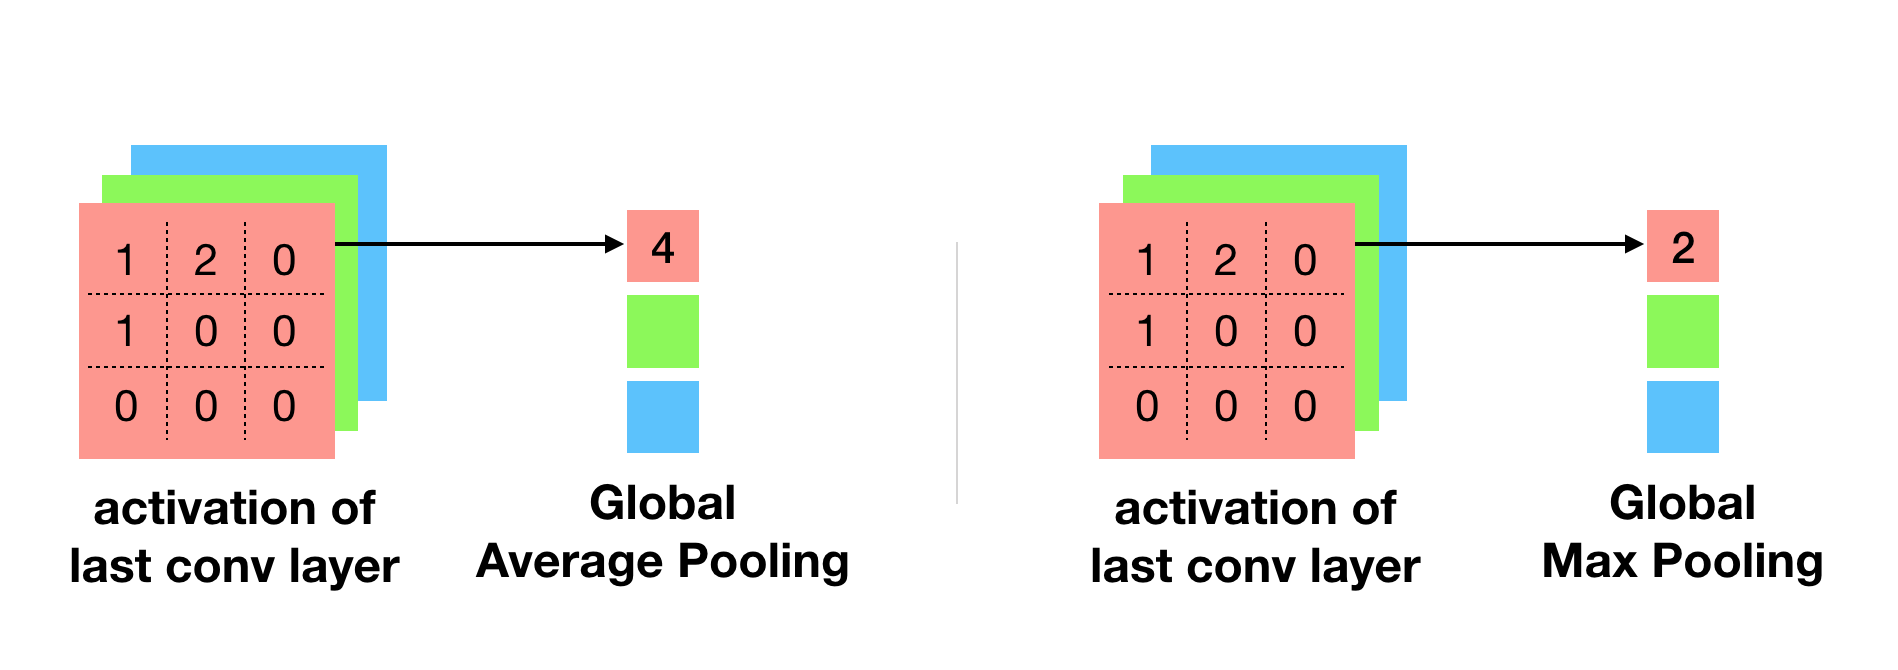

In [4]:
Image("GAP_GMP.png")

## Class activation map (CAM)
CAM은 이미지의 어느 부분이 분류하는데 있어 큰 영향을 주었는지를 분석한다. 이를 위해서 모델에 Global Average Pooling을 적용한다. 이전에 사용했던 Fully connected layer에서는 Flatten을 해주기 때문에 이미지 데이터의 위치 정보가 손실되어 Localization을 하기 힘들었다. GAP는 Flatten시키지 않고 각 채널값을 평균을 내주기 때문에 위치 정보를 갖게 된다. 마지막 convolutional layer의 feature map에서 각 채널의 평균값을 weight와 곱해주고 모두 더해주면 Class activation map을 볼 수 있다. 

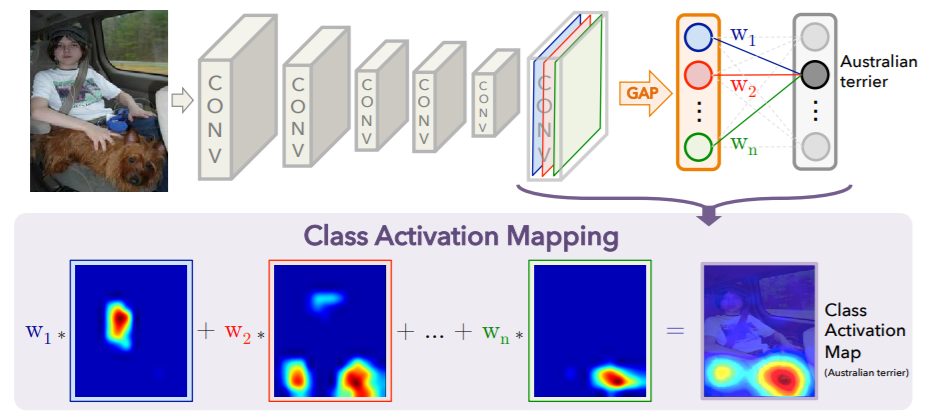

In [5]:
Image("CAM.png")

- 가중치를 기반으로 해당 모델이 이미지의 어떤 부분에 집중되는지 볼 수 있다.
- 예측하는데 있어 중요한 이미지 지역을 보여준다.

## Class activation map formula

## $F_k = \sum_{x, y} f_k(x,y)$    
## $S_c = \sum_k w_k^c \sum_{x,y} = \sum_{x,y}\sum_k w_k^c f_k(x,y)$

- ### $ f_k(x, y) $ 

    k번째 Feature map의 각 activation 값


- ### $ F_k = \sum_{x,y} f_k(x, y) $
    
    k번째 Feature map에 대한 Global Average Pooling


- ### $ S_c = \sum_k w_k^c F_k $
    
    각 클래스에 대한 softmax input
   
   
   $ w_k^c $는 class c에서 $F_k$의 중요성을 나타낸다.


- ### $ \frac {exp(S_c)}{\sum_c exp(S_c)} $ 

    c가 나올 확률

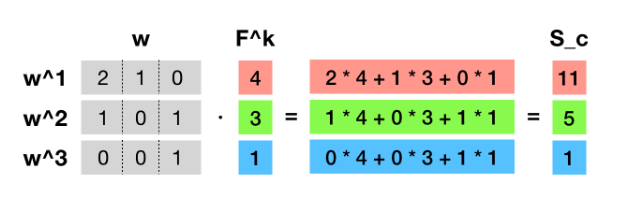

In [6]:
Image("formula.png")

## Visualization
- 각 이미지 별로 어느 부분이 class score에 영향을 미치는지 보여준다.

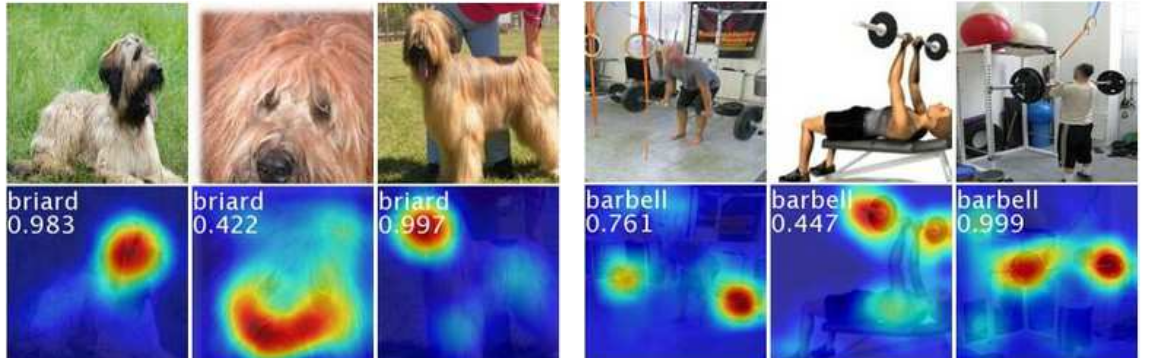

In [7]:
Image("cam_visualization.png")

## CAM을 사용한 실험
- AlexNet, VGGnet, GoogleNet에 CAM을 적용한 결과
- 마지막 Convolutional layer 다음에 fully connected를 제거하고 GAP와 softmax 적용
- GAP과 GMP의 차이를 알아보기 위해 GMP를 적용한 GoogleNet도 학습

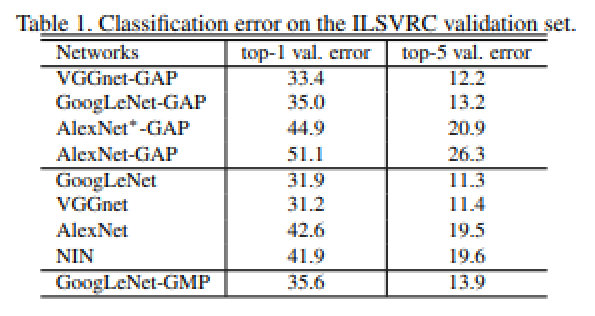

In [11]:
Image("classification error.png")

- 분류 성능은 일반 분류 모델보다 떨어지지만 크게 차이나지는 않는다.
- GMP와 GAP의 분류 성능도 큰 차이 없음 

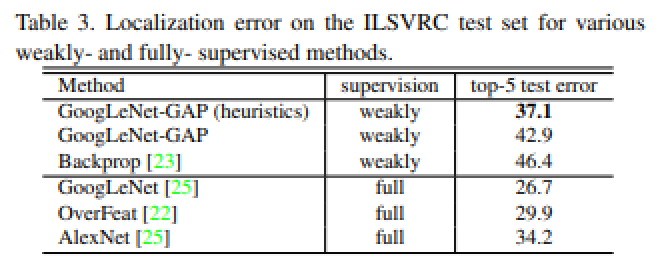

In [13]:
Image("localization error.png")

- Localization 성능은 full supervised localization보다는 다소 떨어지지만 그래도 괜찮은 성능을 가진다.
- heuristics 방법을 쓰면서 localization 성능은 향상되지만 classification 성능는 감소한다.

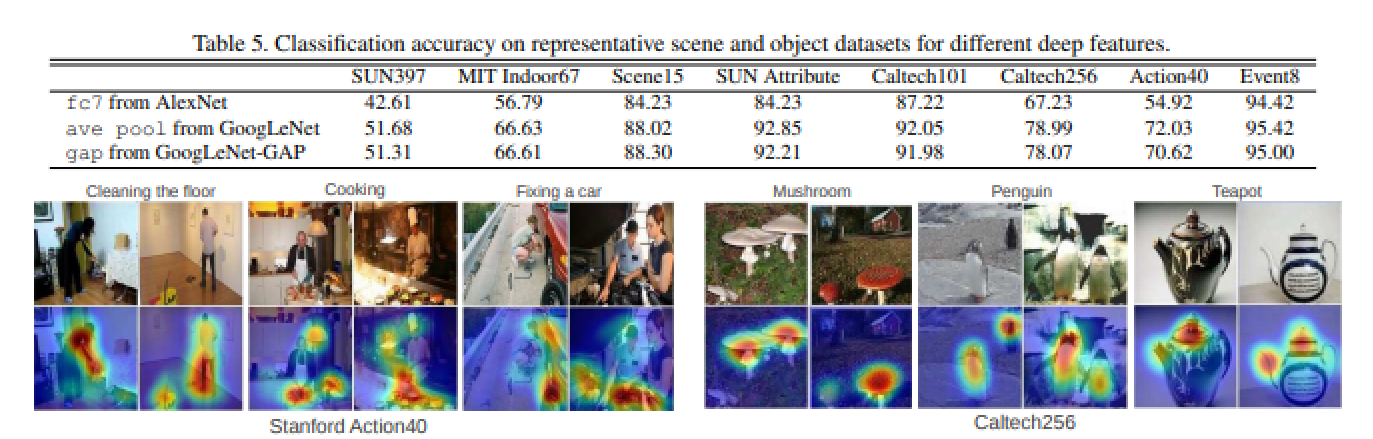

In [14]:
Image("deep feature.png")

- CNN의 higher level layer들이 여러 이미지 데이터셋에서 좋은 성능을 보여주는데 GAP CNN 또한 여러 이미지 데이터셋에서 충분히 좋은 성능을 보여준다.
- Layer가 더 적고 파라미터도 적지만 비슷한 분류 성능을 보인다.

## Pattern Discovery
- GAP를 사용한 모델이 이미지에서 공통적으로 나타나는 패턴들을 파악하는지 보자

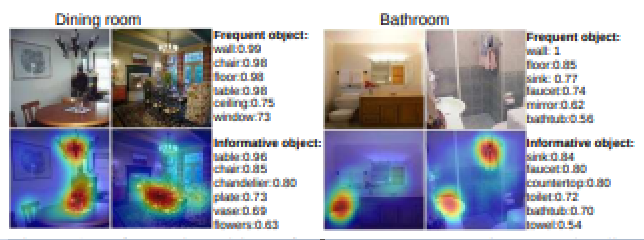

In [19]:
Image("figure7.png")

- 해당 카테고리에 대한 이미지들에서 가장 많이 겹치는 요소들을 보면 해당 카테고리에서 나타나는 물체들의 패턴을 파악할 수 있다. 
- 예를들면 Dining room에서는 wall, chair, floor, table, ceiling 등 dining room에서 자주 발견되는 물체들을 볼 수 있다.

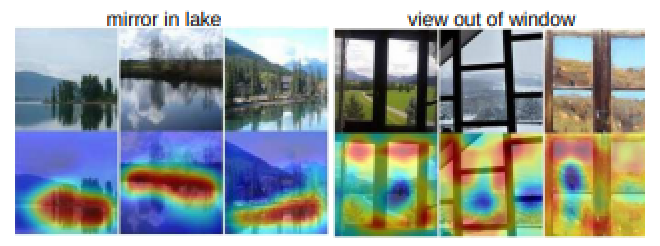

In [20]:
Image("figure8.png")

- Hard negative mining을 사용하여 이미지의 컨셉을 찾아낸다.
    - positive set에는 해당 카테고리 데이터를, negative set에는 카테고리와 무관한 데이터를 학습
- 레이블이 다소 추상적이지만 CAM을 통해 컨셉을 잘 파악하는 것을 볼 수 있다.

## Implementation

In [222]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import cv2
%matplotlib inline

### 테스트 해볼 이미지 불러오기

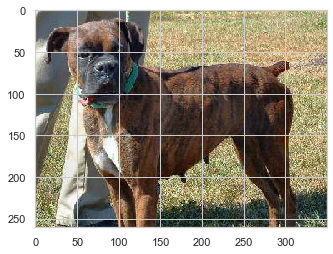

In [223]:
img_path = r'C:\Users\Owner\Downloads\train\train\dog.10396.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)

### Pretrained model input 사이즈에 맞게 resize

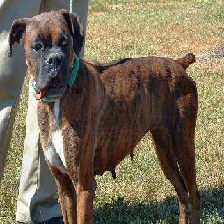

In [224]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [102]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

### Batch 형식으로 맞추기 위해 dimension 추가

In [103]:
x = np.expand_dims(x, 0)
x.shape

(1, 224, 224, 3)

### 이미지 전처리

In [104]:
x = preprocess_input(x)

In [105]:
x

array([[[[147.061    , 134.22101  , 121.32     ],
         [135.061    , 121.221    , 110.32     ],
         [141.061    , 129.22101  , 118.32     ],
         ...,
         [ 29.060997 ,  59.221    ,  71.32     ],
         [ 22.060997 ,  55.221    ,  65.32     ],
         [  2.060997 ,  39.221    ,  44.32     ]],

        [[142.061    , 128.22101  , 117.32     ],
         [135.061    , 121.221    , 110.32     ],
         [137.061    , 125.221    , 116.32     ],
         ...,
         [ 32.060997 ,  62.221    ,  74.32     ],
         [ 20.060997 ,  53.221    ,  63.32     ],
         [ 17.060997 ,  53.221    ,  56.32     ]],

        [[137.061    , 123.221    , 112.32     ],
         [131.061    , 119.221    , 108.32     ],
         [128.061    , 116.221    , 107.32     ],
         ...,
         [ 42.060997 ,  74.221    ,  81.32     ],
         [ 32.060997 ,  66.221    ,  73.32     ],
         [ 42.060997 ,  78.221    ,  81.32     ]],

        ...,

        [[ 67.061    , 101.221    , 10

### Pretrained vgg-16 모델 불러오기

In [4]:
vgg_model = tf.keras.applications.VGG16(weights = 'imagenet')
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 예측

In [37]:
pred = vgg_model.predict(x)

In [56]:
prediction = decode_predictions(pred, top=3)

In [190]:
prediction

[[('n02108089', 'boxer', 0.97419095),
  ('n02108422', 'bull_mastiff', 0.021698665),
  ('n02109047', 'Great_Dane', 0.0012755895)]]

### 예측값은?
- boxer 종으로 나온다

In [70]:
print("Prediction is : {}".format(prediction[0][0][1]))

Prediction is : boxer


In [62]:
x_axis = [decode_predictions(pred, top=3)[0][idx][1] for idx in range(len(decode_predictions(pred, top=3)[0]))]
x_axis

['boxer', 'bull_mastiff', 'Great_Dane']

In [63]:
y_axis = [decode_predictions(pred, top=3)[0][idx][2] for idx in range(len(decode_predictions(pred, top=3)[0]))]
y_axis

[0.97419095, 0.021698665, 0.0012755895]

### Prediction 시각화

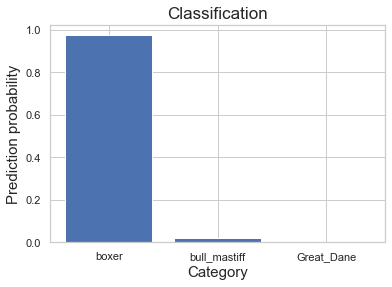

In [73]:
plt.bar(x, y)
plt.title('Classification', fontsize=17)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Prediction probability', fontsize=15)
plt.show()

### 클래스 레이블

In [53]:
class_label = [decode_predictions(pred, top=1000)[0][idx][1] 
               for idx in range(len(decode_predictions(pred, top=1000)[0]))]

In [55]:
len(class_label)

1000

### 예측레이블 인덱스 가져오기

In [78]:
label_idx = np.argmax(pred[0])
label_idx

242

### 예측레이블 인덱스의 output 가져오기

In [80]:
output = vgg_model.output[:, label_idx]

In [85]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 마지막 Conv layer 가져오기

In [89]:
last_conv_layer = vgg_model.get_layer('block5_conv3')

### 마지막 conv layer의 gradient 가져오기

In [90]:
grads = K.gradients(output, last_conv_layer.output)[0]

### Global Average Pooling 적용

In [93]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [96]:
iterate = K.function([vgg_model.input], [pooled_grads, last_conv_layer.output[0]])

### 해당 이미지의 가중치 값과 채널값을 추출 

In [106]:
pooled_grads_value, conv_layer_output_value = iterate([x])

### 가중치와 각 채널과의 곱

In [107]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

### 히트맵

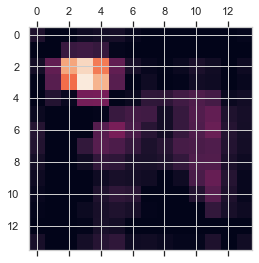

In [133]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

### cv2로 이미지 불러오기

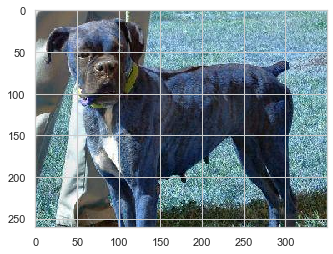

In [111]:
img = cv2.imread(img_path)
plt.imshow(img)

In [116]:
img.shape

(261, 350, 3)

### 히트맵 resize

In [134]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

In [138]:
heatmap = np.uint8(255 * heatmap)

### 컬러맵 적용

In [139]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

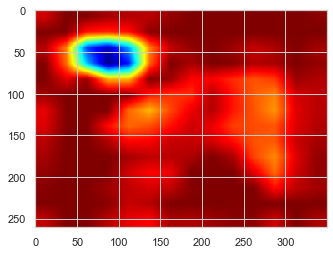

In [140]:
plt.imshow(heatmap)

### 히트맵과 이미지 합치기

Text(0.5, 1.0, 'boxer')

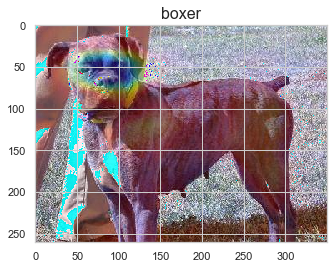

In [163]:
combine_img = heatmap * .3 + img
plt.imshow(combine_img.astype('uint8'))
plt.title(prediction[0][0][1], fontsize=16)

### 함수화

In [234]:
def Class_activation_map(img_path):
    
    # call vgg_model
    model = tf.keras.applications.VGG16(weights = 'imagenet')
    
    # read image
    img = mpimg.imread(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    
    # image preprocessing
    x = image.img_to_array(img)
    x = np.expand_dims(x, 0)
    x = preprocess_input(x)
    
    # prediction
    pred = model.predict(x)
    prediction = decode_predictions(pred, top=3)
    
    # output of predicted label
    label_idx = np.argmax(pred[0])
    output = model.output[:, label_idx]
    
    # get last convolutional layer
    last_conv_layer = model.get_layer('block5_conv3')
    
    # get gradients of last layer
    grads = K.gradients(output, last_conv_layer.output)[0]
    
    # Global average pooling
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    # heatmap
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    # resize heatmap to img
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    # combine image and heatmap
    combine_img = heatmap * 0.3 + img
    plt.imshow(combine_img.astype('uint8'))
    plt.title("Prediction : {}, Prob: {}".format(prediction[0][0][1], prediction[0][0][2]), fontsize=15)
    
    return None

### 테스트 1

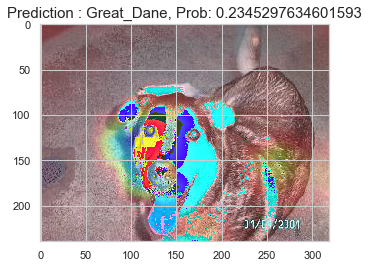

In [235]:
Class_activation_map(r'C:\Users\Owner\Downloads\train\train\dog.10397.jpg')

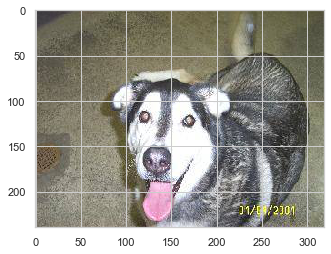

In [217]:
image_dir = r'C:\Users\Owner\Downloads\train\train\dog.10397.jpg'
test_img1 = mpimg.imread(image_dir)
plt.imshow(test_img1)

### 테스트 2

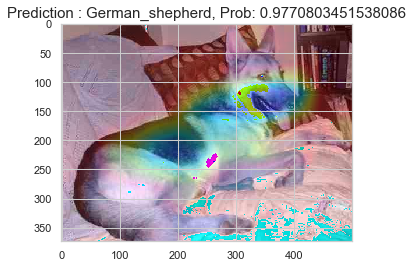

In [237]:
Class_activation_map(r'C:\Users\Owner\Downloads\train\train\dog.10393.jpg')

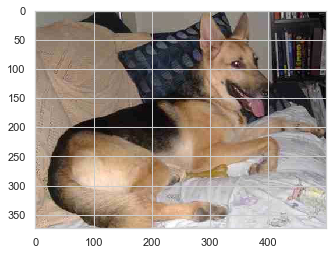

In [238]:
image_dir1 = r'C:\Users\Owner\Downloads\train\train\dog.10393.jpg'
test_img2 = mpimg.imread(image_dir1)
plt.imshow(test_img2)

## Conclusion

- Class activation map을 통해서 위치 정보를 따로 학습하지 않고 좋은 Localization 성능을 보여줄 수 있다.
- Class activation map은 해당 클래스로 분류하는데 영향을 준 feature들을 보여준다.
- 여러 CNN 모델과 성능을 비교했을 때 좋은 성능을 보인다.


## 한계점
- Global Average Pooling layer가 항상 필요하며, 약간의 성능의 감소가 생긴다.
- 마지막 Convolution Layer에서만 CAM 결과를 얻을 수 있다.

## Reference

1. B. Zhou, A. Khosla, A. Lapedriza, A. Oliva and A. Torralba, "Learning Deep Features for Discriminative Localization," 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, 2016, pp. 2921-2929, doi: 10.1109/CVPR.2016.319.
2. https://kangbk0120.github.io/articles/2018-02/cam
3. https://jsideas.net/class_activation_map/
4. https://poddeeplearning.readthedocs.io/ko/latest/CNN/CAM%20-%20Class%20Activation%20Map/